Import relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from scipy import stats

Importing the necessary dataset, in this case the dataset concerned with Country Togo.

In [2]:
url='https://raw.githubusercontent.com/Esmael-Mohammed/tenx-Week0/refs/heads/main/notebooks/data/togo-dapaong_qc.csv'

In [5]:
data_frame=pd.read_csv(url)

Brief description about the dataset. This includes the shape, head and tail, data types and a general overview of the dataset. Starting from the shape of the data i am going to proceed respectively.

In [6]:
# Understand the shape of the distribution.
data_frame.shape

(525600, 19)

In [7]:
# Overview of the variables.
data_frame.head

<bound method NDFrame.head of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        W

In [8]:
# List of each column in the dataset.
data_frame.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [9]:
# View of the data types of each column.
data_frame.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [10]:
# A general description of the dataset.
data_frame.describe

<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

     

# Data preparation stage

In [11]:
# Subsetting the columns that i consider irrelevant to my analysis.
# Also re-assign the data_frame variable

df = data_frame[['Timestamp', 'GHI', 'DNI', 'DHI',
            'ModA', 'ModB', 
            'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev','Cleaning','WD',
            #'WDstdev', 'BP', 'Comments',
            'Precipitation','TModA', 'TModB',]].copy()

In [12]:
# Checking the number of coulmns included.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')

In [ ]:
# Overview of the data types. data types of the 
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
Cleaning           int64
WD               float64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

In [14]:
# The time stamp shouldn't be an object so i am going to convert it to a datetime coulmn.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
# look for missing values.
df.isna().sum()
# All our metrics have no missing values.

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
Cleaning         0
WD               0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [16]:
# Look for duplicated values.
df.loc[df.duplicated()]
# None of our values are duplicated.

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, Cleaning, WD, Precipitation, TModA, TModB]
Index: []

## Descriptive statistics
First we are going to present a summary statistics.

In [17]:
# Summary statistics
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000       4.400000       4.300000      27.200000   
75%       215.700000     422.525000     411.000000      31.100000   
max       805.700000    1380.000000    1367.000000      41.400000   
std       156.520714     317.346938     307.932510       4.758023   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       55.013160       2.368093       3.229490       0.557740   
min         3.300000       0.000000       0.000000       0.000000   
25%        26.500000       1.400000       1.900000       0.400000   
50%        59.300000       2.200000       2.900000       0.500000   
75%        80.800000       3.200000       4.400000       0.700000   
max        99.800000      16.100000      23.100000       4.700000   
std        28.778732       1.462668       1.882565       0.268923   

            Cleaning             WD  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        0.000535     161.741845       0.001382      32.444403   
min         0.000000       0.000000       0.000000      13.100000   
25%         0.000000      74.800000       0.000000      23.900000   
50%         0.000000     199.100000       0.000000      28.400000   
75%         0.000000     233.500000       0.000000      40.600000   
max         1.000000     360.000000       2.300000      70.400000   
std         0.023116      91.877217       0.026350      10.998334   

               TModB  
count  525600.000000  
mean       33.543330  
min        13.100000  
25%        23.600000  
50%        28.400000  
75%        43.000000  
max        94.600000  
std        12.769277

After having a brief overview of the descriptive statistics we check for the existence of outliers. It can be implemented using two ways(IQR method and the Z-score method). I have chosen the Z-score method for the sake of convenience and due to the short deadline.

In [18]:
from scipy.stats import zscore  # Import the zscore function
# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df.drop('Timestamp', axis=1).apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each column in the DataFrame
for column in benin_df_numeric.columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")


Number of outliers in GHI: 305
Number of outliers in DNI: 1062
Number of outliers in DHI: 3415
Number of outliers in ModA: 137
Number of outliers in ModB: 206
Number of outliers in Tamb: 0
Number of outliers in RH: 0
Number of outliers in WS: 3510
Number of outliers in WSgust: 3915
Number of outliers in WSstdev: 5753
Number of outliers in Cleaning: 281
Number of outliers in WD: 0
Number of outliers in Precipitation: 3338
Number of outliers in TModA: 153
Number of outliers in TModB: 609
Number of remaining outliers after replacement: 7217


After the first attempt there are some outliers still left 
in some columns so in the next line of code we try to remove these remaining outliers.

In [19]:
# Selected columns for outlier removal
selected_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WD']

# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each selected column in the DataFrame
for column in selected_columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")


Number of outliers in GHI: 17
Number of outliers in DNI: 268
Number of outliers in DHI: 1540
Number of outliers in ModA: 3
Number of outliers in ModB: 5
Number of outliers in WD: 0
Number of remaining outliers after replacement: 764


In the next line of code we are going to change on the values after removing the outliers.

In [20]:
# Statistical check for outliers using the summary statistics.
df.describe()

Timestamp            GHI           DNI  \
count                         525600  525600.000000  525600.00000   
mean   2022-04-25 12:00:30.000000768     229.793238     148.91030   
min              2021-10-25 00:01:00     -12.700000       0.00000   
25%              2022-01-24 06:00:45      -2.200000       0.00000   
50%              2022-04-25 12:00:30       2.000000       0.00000   
75%              2022-07-25 18:00:15     441.025000     240.10000   
max              2022-10-25 00:00:00    1194.000000     895.00000   
std                              NaN     321.599395     247.99911   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      110.722169     225.820398     219.093516      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         1.800000       4.300000       4.200000      27.200000   
75%       207.700000     421.900000     410.100000      31.100000   
max       566.200000    1176.000000    1141.000000      41.400000   
std       149.312322     316.951351     307.349758       4.758023   

                  RH             WS         WSgust        WSstdev  Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000  525600.0   
mean       55.013160       2.330341       3.173601       0.545632       0.0   
min         3.300000       0.000000       0.000000       0.000000       0.0   
25%        26.500000       1.400000       1.900000       0.400000       0.0   
50%        59.300000       2.200000       2.900000       0.500000       0.0   
75%        80.800000       3.200000       4.300000       0.700000       0.0   
max        99.800000       6.700000       8.800000       1.300000       0.0   
std        28.778732       1.388202       1.770451       0.243415       0.0   

                  WD  Precipitation          TModA          TModB  
count  525600.000000       525600.0  525600.000000  525600.000000  
mean      161.741845            0.0      32.433174      33.485223  
min         0.000000            0.0      13.100000      13.100000  
25%        74.800000            0.0      23.900000      23.600000  
50%       199.100000            0.0      28.400000      28.400000  
75%       233.500000            0.0      40.600000      42.900000  
max       360.000000            0.0      65.400000      71.800000  
std        91.877217            0.0      10.982731      12.676540

The Togo summary statistics show a number of intriguing patterns in the environmental and meteorological conditions of the nation:

#### Solar Resource Availability: 
Togo has a significant amount of solar resource availability, as indicated by the mean values for Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI). The DNI, which predominates, indicates that direct sunlight serves as the main solar energy source. Significant variability in solar radiation levels is suggested by the broad range between the minimum and highest values, especially for GHI and DNI. These variations are probably caused by meteorological conditions and cloud cover.
#### Temperature and Humidity: 
A warm tropical environment with some temperature changes is indicated by the mean ambient temperature (Tamb), which is approximately 27.75°C with a range of 14.9°C to 41.4°C. The fluctuating humidity conditions in Togo are shown by the relative humidity (RH), which has a mean of 55.01% and a large range from 3.3% to 99.8%. This could have ramifications for agricultural activities and infrastructure.
#### Wind characteristics: 
The maximum gust speed (WSgust) is 3.17 m/s, while the mean wind speed (WS) is 2.33 m/s. The wind speed standard deviation (WSstdev), which is 0.55, indicates some unpredictability in the wind conditions. According to the wind direction (WD) statistics, Togo has a wide variety of wind patterns, ranging from 0 to 360 degrees.
#### Precipitation: 
The data indicates that no precipitation events were recorded during the given period, which could indicate a dry climate or that no precipitation events were captured during data collection. On the other hand, a constraint in the data reporting or collection procedure can also be the cause of the lack of precipitation data.








# Analysis
### Time series analysis

After removing the outliers and being done with the data cleaning and basic understanding stages let's proceed to the analysis part. We start by conducting a time series analysis to show trends by days and months. I am going to proceed with the time series analysis by using line graphs of the key metircs(variables mentioned).

In [21]:
# Overview of the relevant columns.
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')


C:\Users\KIoT\AppData\Local\Temp\ipykernel_15768\342988382.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


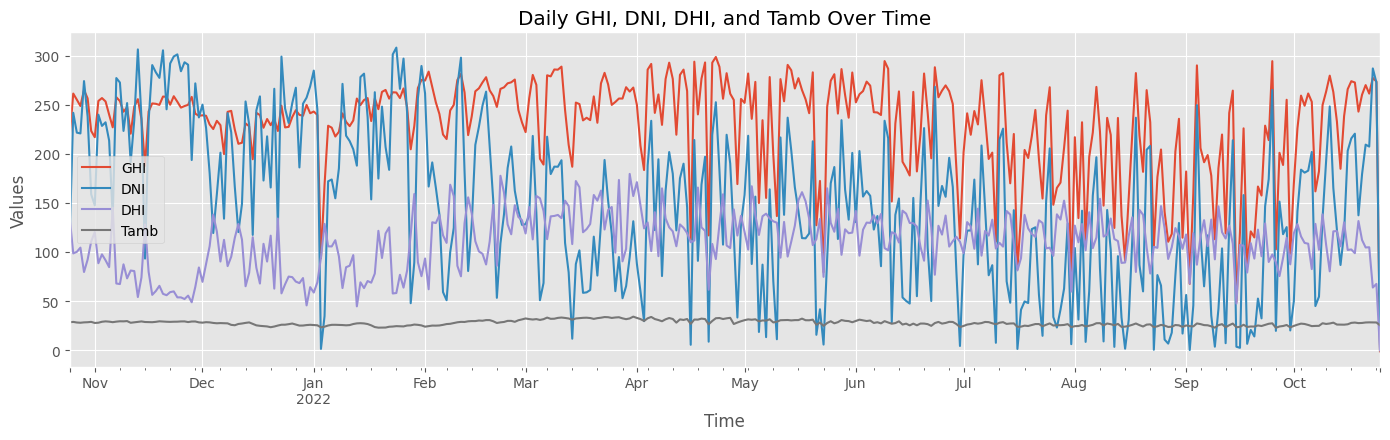

In [22]:
# Set 'Timestamp' as the index for easier time series plotting
df.set_index('Timestamp', inplace=True)

# Resample the data by day or month to observe patterns (optional: you can resample by hour as well)
df_daily = df.resample('D').mean()
df_monthly = df.resample('M').mean()

# Plotting GHI, DNI, DHI, and Tamb over time (using daily resampled data)
plt.figure(figsize=(14, 8))

# Line plot for GHI, DNI, DHI, and Tamb
plt.subplot(2, 1, 1)
df_daily[['GHI', 'DNI', 'DHI', 'Tamb']].plot(ax=plt.gca(), linewidth=1.5)
plt.title('Daily GHI, DNI, DHI, and Tamb Over Time')
plt.ylabel('Values')
plt.xlabel('Time')
plt.grid(True)

plt.tight_layout()
plt.show()


In the next line of code we are going to evaluate the impact of cleaning on the two sensors(ModA and ModB) by using the cleaning column.

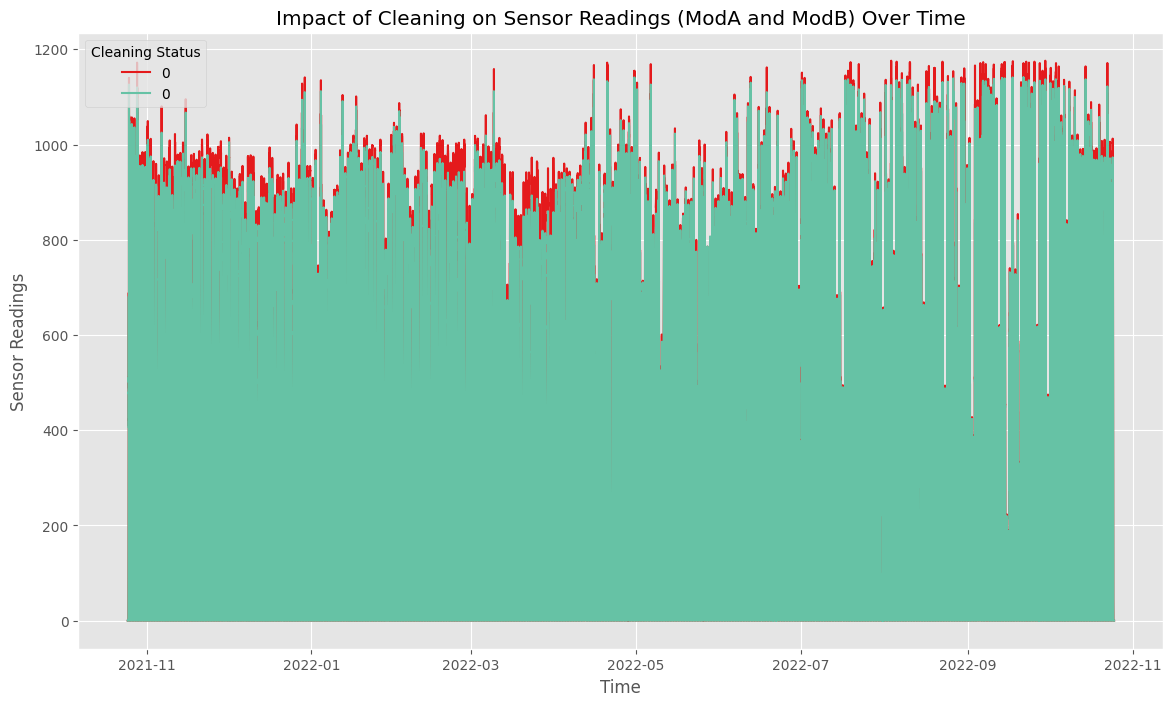

In [23]:
# Check if 'Cleaning' column exists
if 'Cleaning' not in df.columns:
    raise KeyError("The 'Cleaning' column is not present in the DataFrame.")

# Check if 'Timestamp' column is set as index; if not, set it
if df.index.name != 'Timestamp':
    df.set_index('Timestamp', inplace=True)

# Define the figure size
plt.figure(figsize=(14, 8))

# Plot ModA and ModB sensor readings over time, colored by the 'Cleaning' column
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette='Set1', linewidth=1.5)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette='Set2', linewidth=1.5)

# Add titles and labels
plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB) Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend(title='Cleaning Status')
plt.grid(True)

# Show the plot
plt.show()


### Correlational analysis

The next line of code conducts a correlational analysis by using heatmaps and pairplots in order to visualize the correaltion between key metrics in the solar radiation side(GHI, DNI , DHI) and temprature side(TModA and TModB).
It also further investigates the relationship between wind conditions(WS, WSgust, WD) and solar irradiance using scatter matrices.

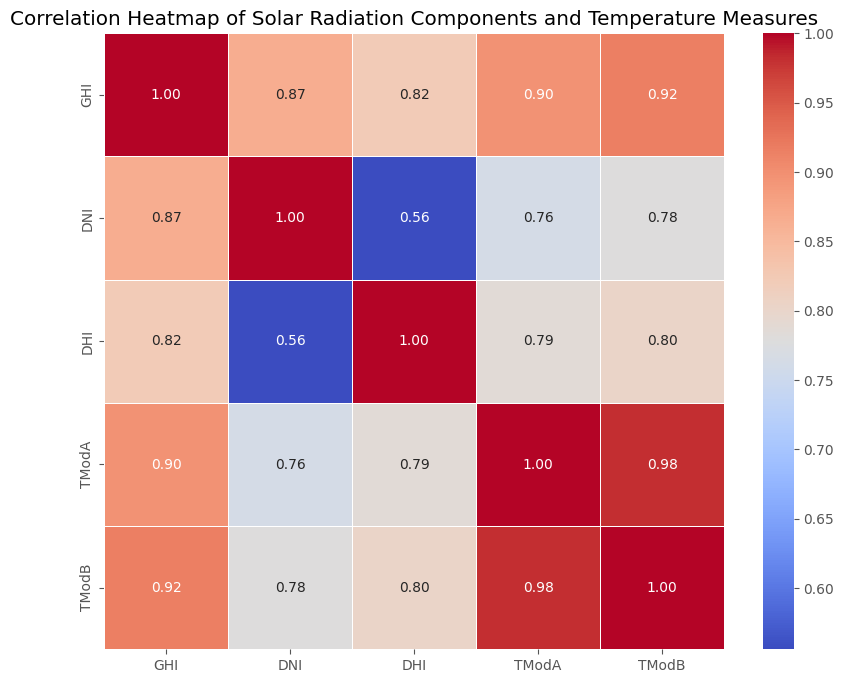

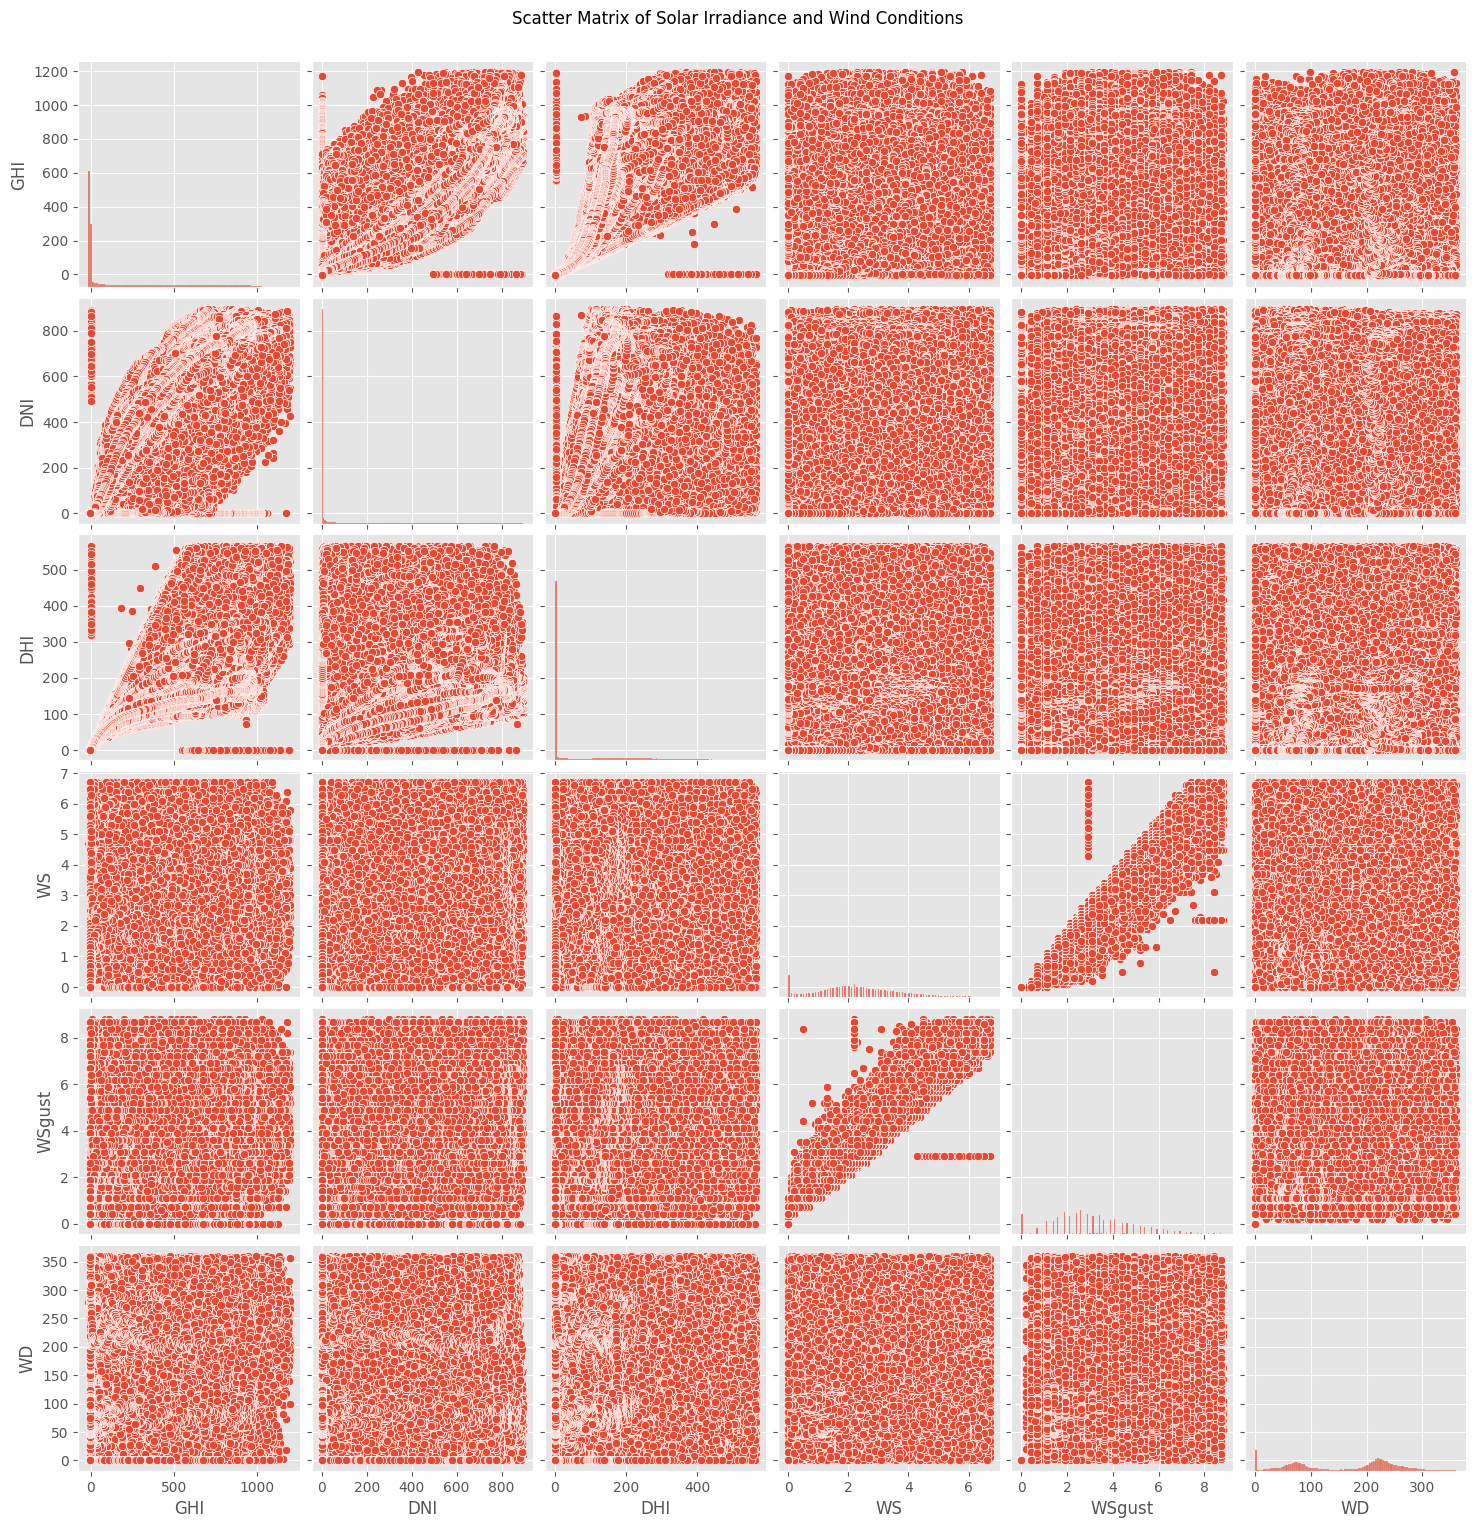

In [24]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Correlation Analysis
# Select relevant columns for correlation analysis
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = df[corr_columns]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation Components and Temperature Measures')
plt.show()

# Scatter Matrix Analysis
# Select columns for scatter matrix analysis
scatter_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
scatter_data = df[scatter_columns]

# Plot scatter matrix (pairplot) to investigate relationships
sns.pairplot(scatter_data)
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.02)
plt.show()


### Wind analysis

The following code investigates the trends and significant wind event by showcasing the distribution of wind speed, direction, and variability of wind direction. It utilizes olar plots to show the trends.

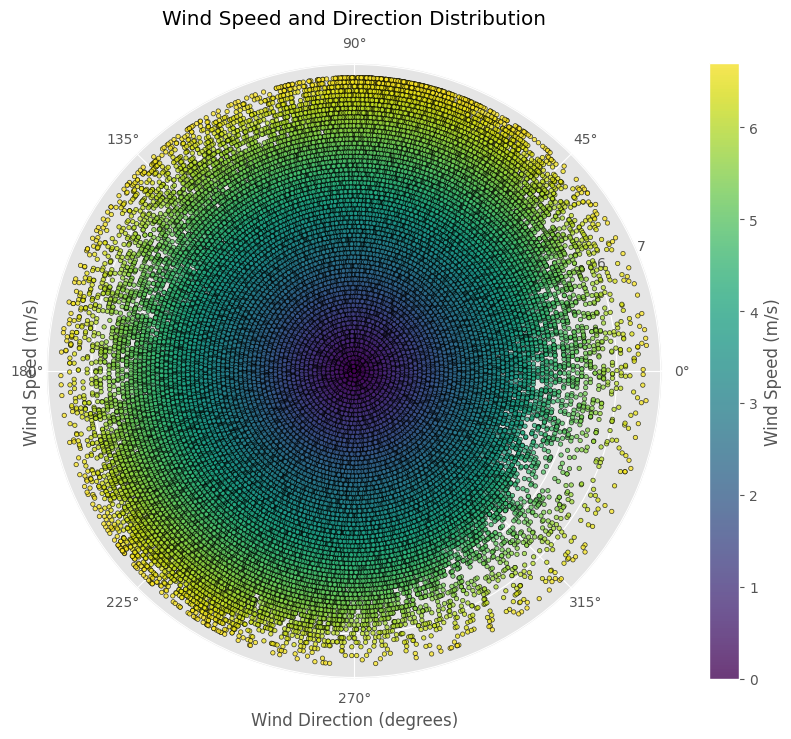

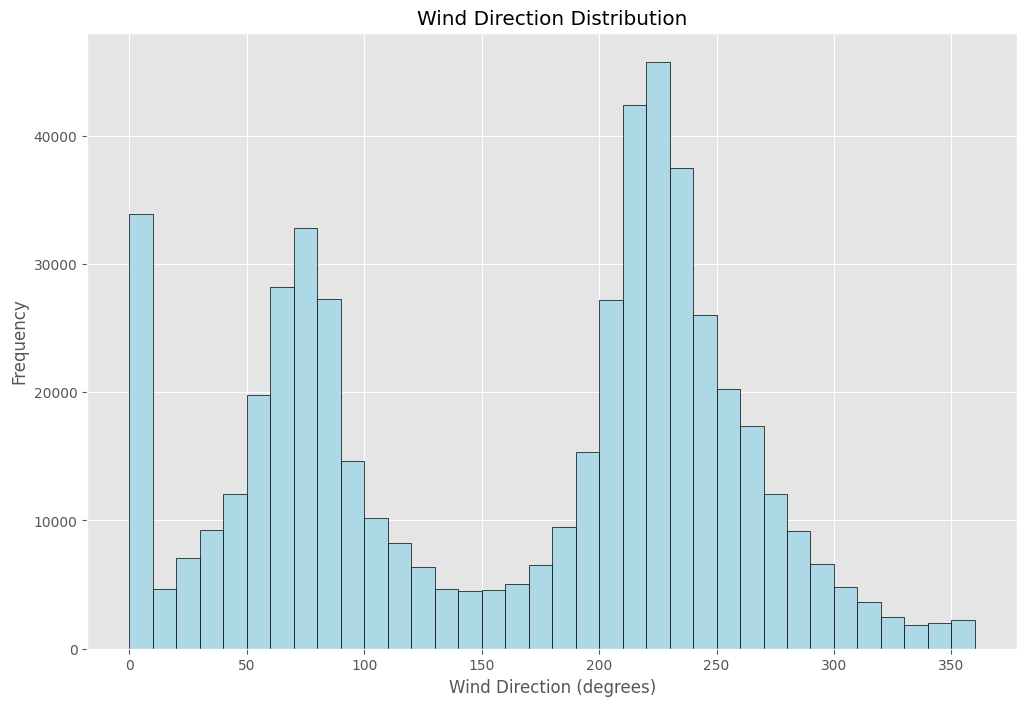

In [25]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['WS', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Convert wind direction to radians for polar plotting
df['WD_rad'] = np.deg2rad(df['WD'])

# Plotting Wind Speed vs. Wind Direction (Polar Plot)
plt.figure(figsize=(12, 8))

# Create polar plot for wind speed distribution
ax = plt.subplot(1, 1, 1, projection='polar')
c = ax.scatter(df['WD_rad'], df['WS'], c=df['WS'], cmap='viridis', s=10, alpha=0.75, edgecolors='k', linewidth=0.5)

# Add color bar
plt.colorbar(c, ax=ax, label='Wind Speed (m/s)')

# Customize plot
ax.set_title('Wind Speed and Direction Distribution', va='bottom')
ax.set_xlabel('Wind Direction (degrees)')
ax.set_ylabel('Wind Speed (m/s)')

plt.show()

# Plotting Wind Direction Variability
plt.figure(figsize=(12, 8))

# Create a histogram for wind direction to analyze variability
plt.hist(df['WD'], bins=36, edgecolor='black', color='lightblue')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


### Temprature analysis

Below an analysis of how relative humidity(RH) influences temprature readings and solar radiation is conducted. It is conducted by the use of scatter plots and heatmaps.

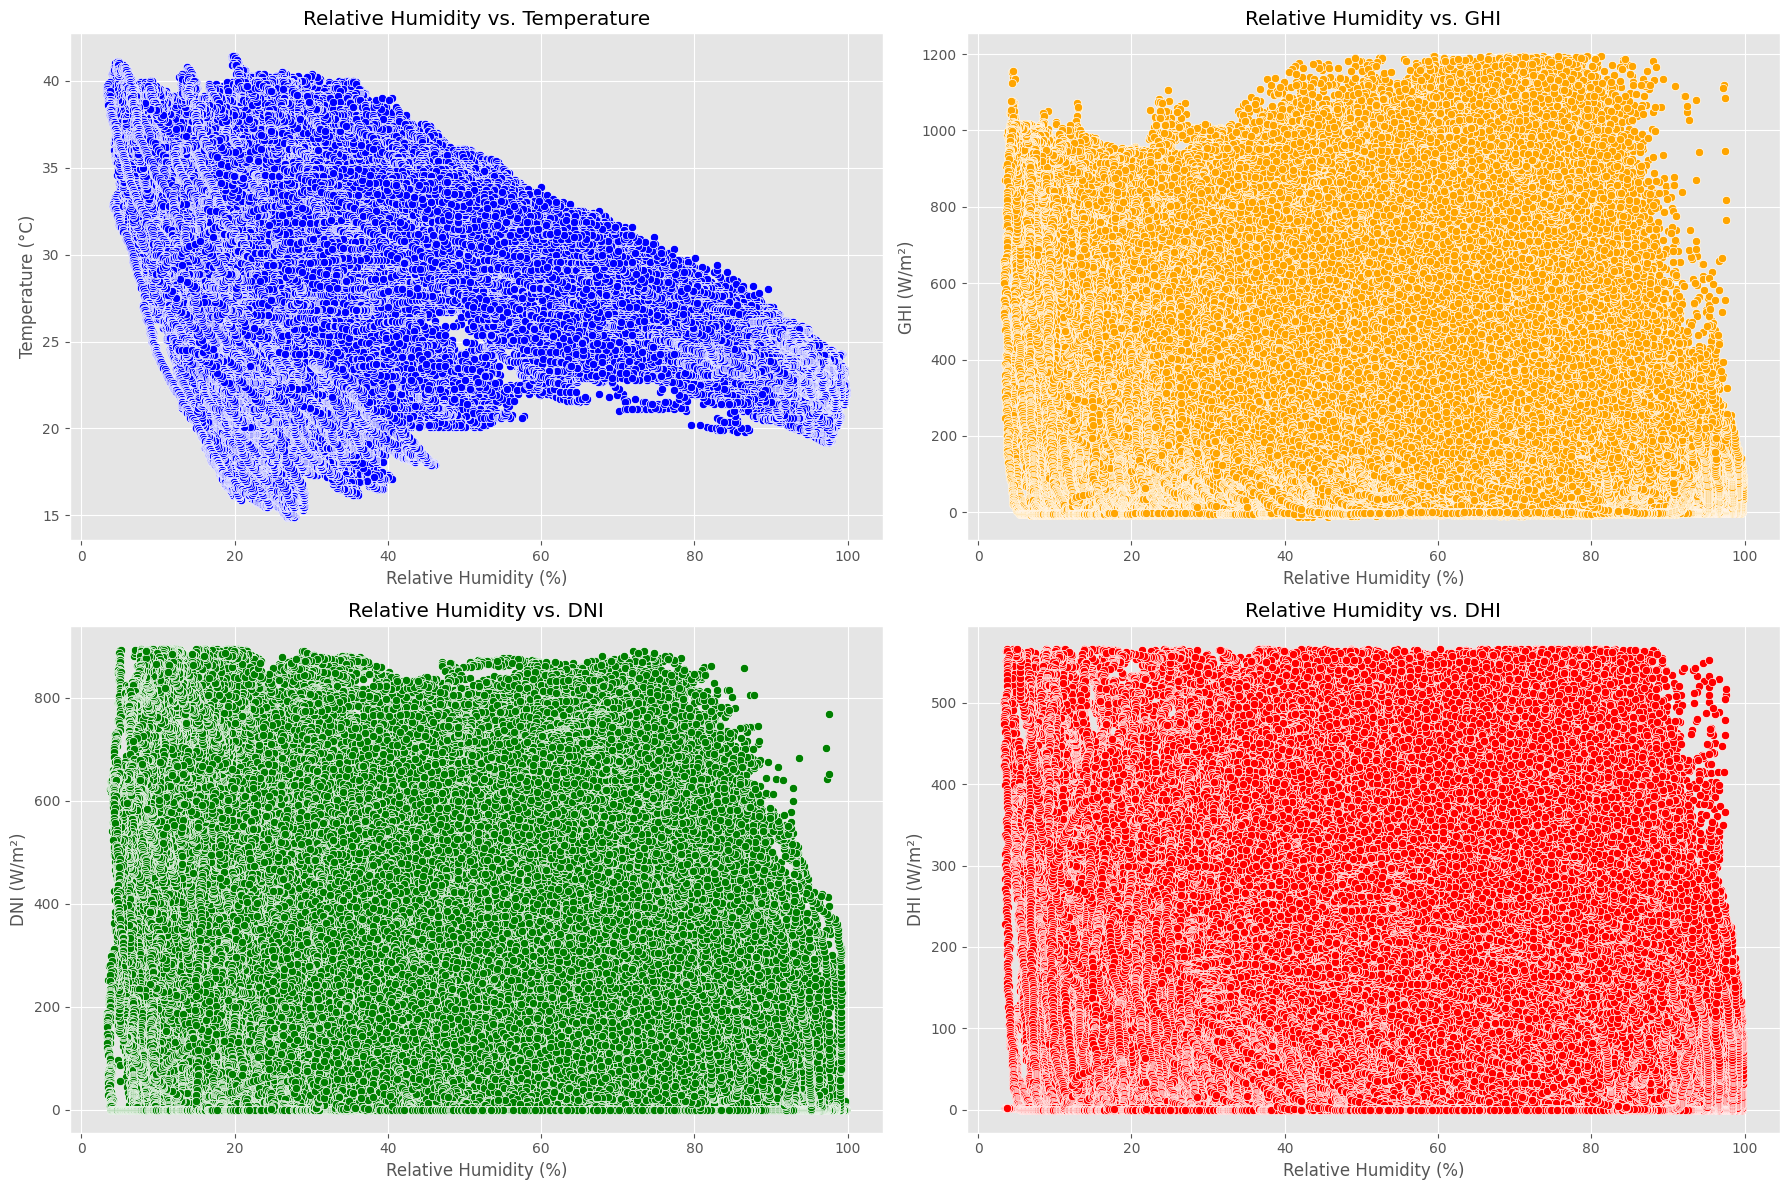

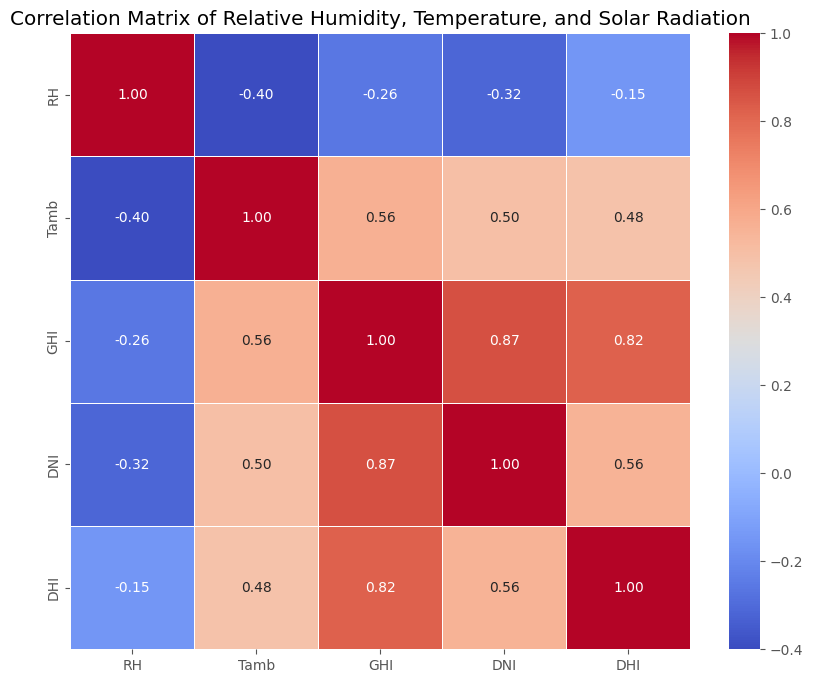

In [26]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Scatter plot for RH vs. Temperature (Tamb)
plt.subplot(2, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Scatter plot for RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(2, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='orange')
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DNI (Direct Normal Irradiance)
plt.subplot(2, 2, 3)
sns.scatterplot(x='RH', y='DNI', data=df, color='green')
plt.title('Relative Humidity vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DHI (Diffuse Horizontal Irradiance)
plt.subplot(2, 2, 4)
sns.scatterplot(x='RH', y='DHI', data=df, color='red')
plt.title('Relative Humidity vs. DHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()

# Correlation matrix for RH, Temperature, and Solar Radiation
correlation_cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
correlation_matrix = df[correlation_cols].corr()

# Plot the heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Relative Humidity, Temperature, and Solar Radiation')
plt.show()

### Histograms

The code below visualizes the frequency distribution of key metrics like GHI, DNi, DHI, WS and tempratures by the use of histograms.

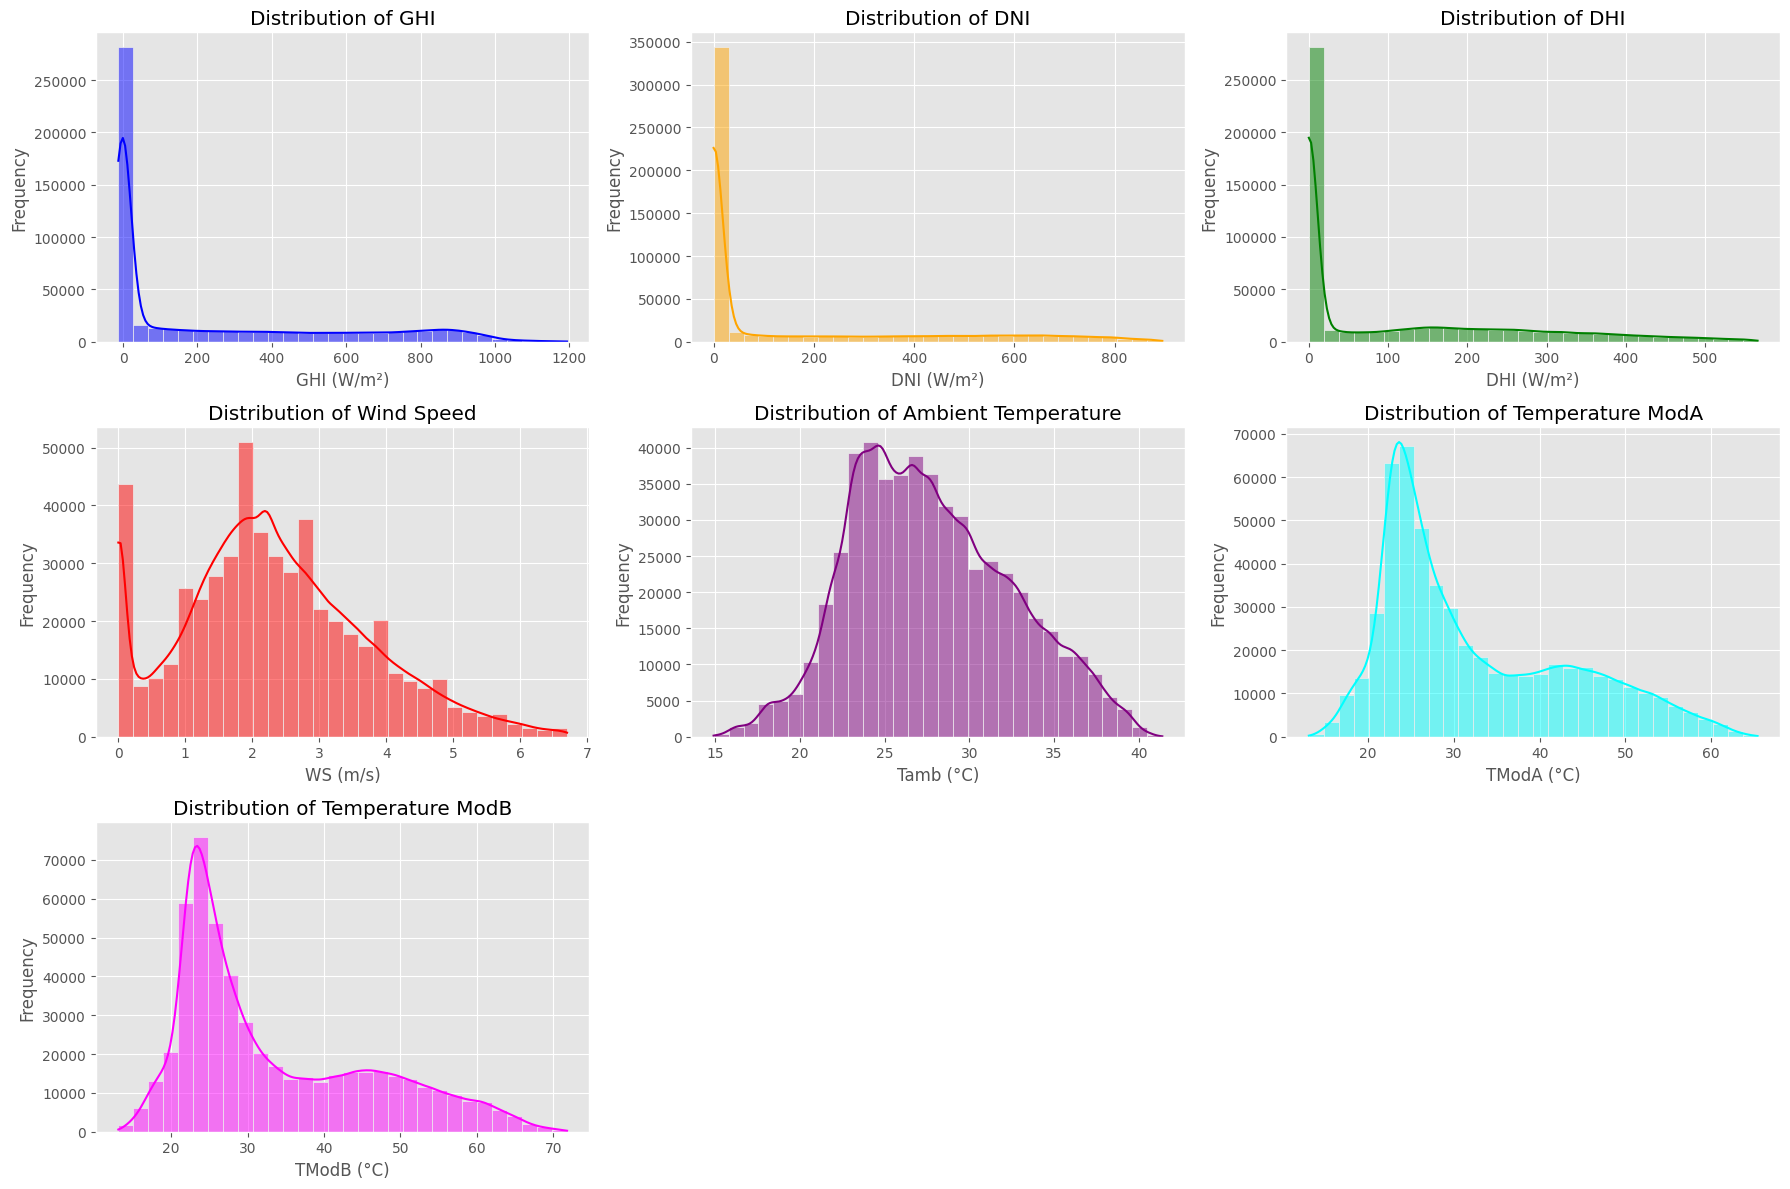

In [27]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Histogram for GHI (Global Horizontal Irradiance)
plt.subplot(3, 3, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='blue')
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DNI (Direct Normal Irradiance)
plt.subplot(3, 3, 2)
sns.histplot(df['DNI'], bins=30, kde=True, color='orange')
plt.title('Distribution of DNI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DHI (Diffuse Horizontal Irradiance)
plt.subplot(3, 3, 3)
sns.histplot(df['DHI'], bins=30, kde=True, color='green')
plt.title('Distribution of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(3, 3, 4)
sns.histplot(df['WS'], bins=30, kde=True, color='red')
plt.title('Distribution of Wind Speed')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

# Histogram for Tamb (Ambient Temperature)
plt.subplot(3, 3, 5)
sns.histplot(df['Tamb'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ambient Temperature')
plt.xlabel('Tamb (°C)')
plt.ylabel('Frequency')

# Histogram for TModA (Temperature Sensor A)
plt.subplot(3, 3, 6)
sns.histplot(df['TModA'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Temperature ModA')
plt.xlabel('TModA (°C)')
plt.ylabel('Frequency')

# Histogram for TModB (Temperature Sensor B)
plt.subplot(3, 3, 7)
sns.histplot(df['TModB'], bins=30, kde=True, color='magenta')
plt.title('Distribution of Temperature ModB')
plt.xlabel('TModB (°C)')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Bubble charts

In the code below, an attempt is made to show the complex relationships between variables, such as GHI vs Tamb vs WS, where the Bubble sizes also represent an additional variable liek RH or Baro metric pressure

In the code below, an attempt is made to show the complex relationships between variables, such as GHI vs Tamb vs WS, where the Bubble sizes also represent an additional variable liek RH or Baro metric pressure

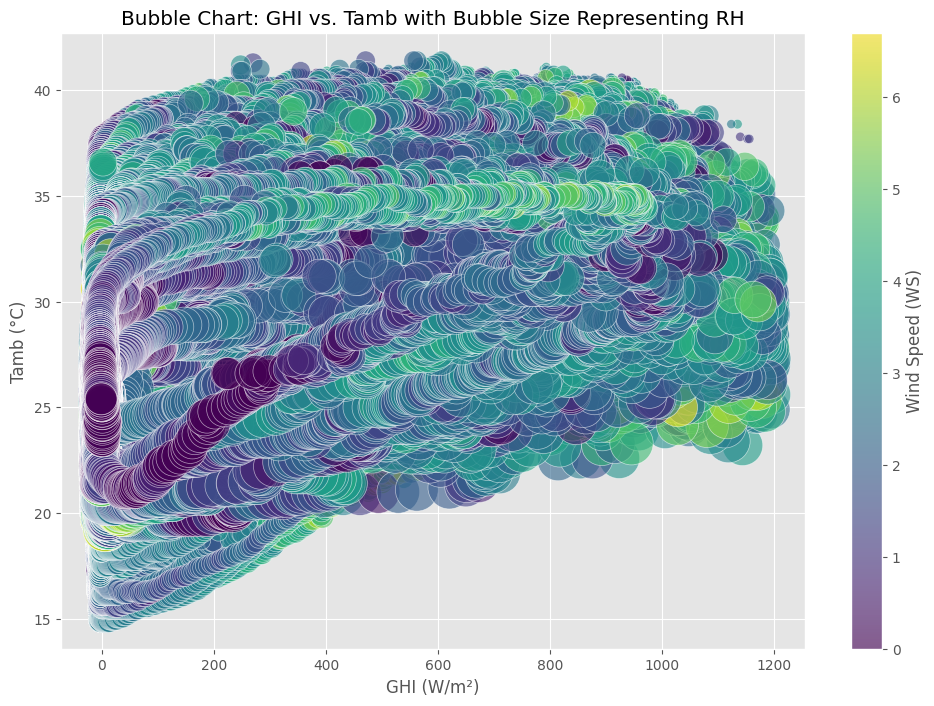

In [28]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'Tamb', 'WS', 'RH']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Plot Bubble Chart
plt.figure(figsize=(12, 8))

# Scatter plot for GHI vs. Tamb with bubble size representing RH
plt.scatter(
    x=df['GHI'],              # X-axis: GHI (Global Horizontal Irradiance)
    y=df['Tamb'],             # Y-axis: Tamb (Ambient Temperature)
    s=df['RH'] * 10,          # Bubble size: RH (Relative Humidity) scaled for visibility
    c=df['WS'],               # Color by WS (Wind Speed)
    cmap='viridis',           # Colormap for Wind Speed
    alpha=0.6,                # Transparency level of bubbles
    edgecolors='w',           # White edge color for bubbles
    linewidth=0.5             # Edge line width
)

# Add color bar to indicate Wind Speed
plt.colorbar(label='Wind Speed (WS)')

# Add titles and labels
plt.title('Bubble Chart: GHI vs. Tamb with Bubble Size Representing RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')

# Show plot
plt.grid(True)
plt.show()
